<a href="https://colab.research.google.com/github/Ashish1999Kumar/Deep-learning/blob/master/sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-w*x-b))

In [35]:
sigmoid(0,1,1)

0.7310585786300049

In [0]:
X=np.linspace(-10,10,100)

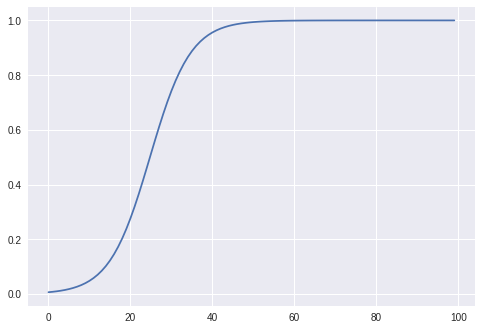

In [37]:
w=1 #@param {type: "slider", min: -10, max: 10}
b=5 #@param {type: "slider", min: -2, max: 5}
Y=sigmoid(X,w,b)

plt.plot(Y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
sigmoid_2d(0,0,0,1,1)
from mpl_toolkits import mplot3d

In [52]:
print(Y)

[0.01591256 0.65159573 0.03841267 0.06733361 0.05892046 0.86508782
 0.16542991 0.67291322 0.05729476 0.98931081 0.86156051 0.77925997
 0.79731235 0.94901439 0.98730219 0.41201528 0.83277049 0.04437348
 0.9922295  0.1120012  0.8932412  0.02217292 0.56297675 0.86096514
 0.9942697 ]


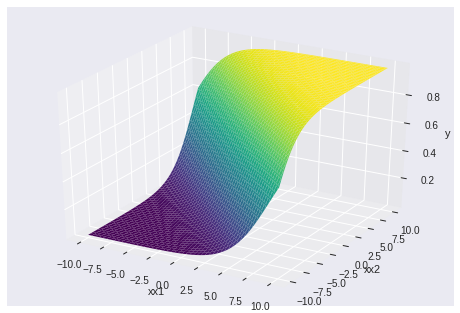

In [118]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
w1=0.5
w2=0.5
b=0.5
XX1, XX2 = np.meshgrid(X1,X2)
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

In [0]:
mcap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

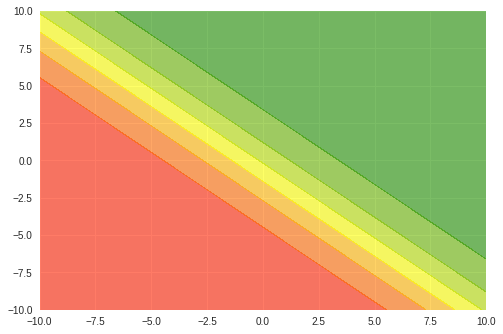

In [120]:
plt.contourf(XX1,XX2,Y,cmap=mcap,alpha=0.6)
plt.show()

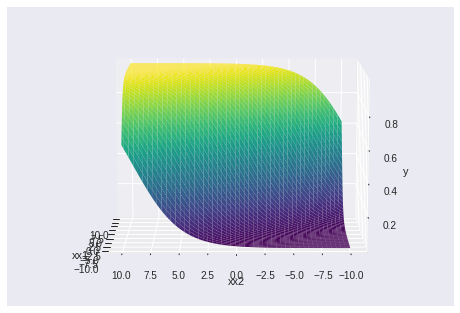

In [41]:
ax.view_init(10, 180)
fig

In [42]:
X=np.random.random(25)*20-10
Y=sigmoid(X,.5,.25)
X

array([-8.74921217e+00,  7.52121660e-01, -6.94039596e+00, -5.75677613e+00,
       -6.04167849e+00,  3.21641404e+00, -3.73673832e+00,  9.42781696e-01,
       -6.10108889e+00,  8.55555214e+00,  3.15662397e+00,  2.02271808e+00,
        2.23916076e+00,  5.34776091e+00,  8.20709262e+00, -1.21128107e+00,
        2.71078174e+00, -6.63945031e+00,  9.19924088e+00, -4.64092162e+00,
        3.74856911e+00, -8.07292218e+00,  6.50384603e-03,  3.14665871e+00,
        9.81248058e+00])

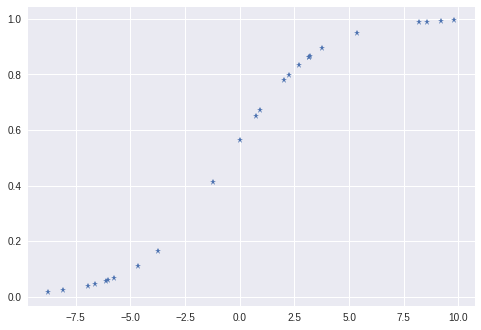

In [43]:
plt.plot(X,Y,'*')

In [0]:
W=np.linspace(-1,1,101)
B=np.linspace(-1,1,102)

ww,bb=np.meshgrid(W,B)

In [0]:
def loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
Loss=np.zeros(ww.shape)

In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    Loss[i,j]=loss(X,Y,ww[i,j],bb[i,j])

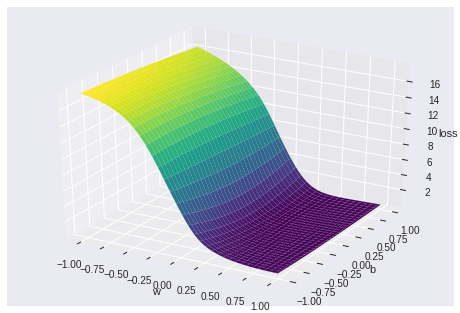

In [70]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');

In [0]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [72]:
print(i,j)

63 75


In [73]:
print(ww[i,j],bb[i,j])

0.5 0.24752475247524752


In [74]:
print(Loss.shape)

(102, 101)


In [0]:
class sigmoid_neuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

In [0]:
sn=sigmoid_neuron()

In [141]:
X=np.asarray([[1,2],[3,4],[-1,4],[6,-1],[5,5],[-1,-1]])
Y=np.asarray([0,1,1,1,0,1])
for i in range(10):
  sn.fit(X,Y)
  print(sn.w,sn.b)

[[ 0.57596373 -0.76250005]] [0.05386117]
[[-0.30703746 -0.06617491]] [0.23107104]
[[-0.95325255 -0.14322878]] [-0.04907874]
[[-0.73982497 -0.4458324 ]] [0.12727875]
[[0.63500175 1.1729914 ]] [0.1381198]
[[-0.49421841  0.52972326]] [0.1326285]
[[1.21471268 0.19122698]] [0.12724637]
[[0.47866711 0.36043839]] [0.05404084]
[[ 0.45167963 -0.0597165 ]] [0.27766898]
[[0.73132849 0.33119121]] [0.41612739]
